# What is DeepLearning

ここではDeepLearningに関する概要説明を行います。<br>
※Pytorchでコードを書く・読む際に流れを理解する程度の概要説明となります。

## DeepLearningとは？

DeepLearning（ディープラーニング、深層学習）とは、何層も重ねたニューラルネットワーク（Neural Network）を用いて、データの特徴を自動的に抽出する機械学習手法、になります。<br>
通常の機械学習手法では、特徴量エンジニアリングを行い、人手で特徴量をデータから抽出し、判定モデルを作成するのに対し、<br>
DeepLearningでは自動で特徴量抽出を実施し、判定モデルを構築する、という所に大きな差分があります。<br>

ただし、一般的にDeepLearningでは他の機械学習手法と比べて、（教師あり学習の場合）多くのデータ量を学習時に利用しないと、精度が出ないケースが多いです。

## ニューラルネットワークとは？

ニューラルネットワークは、端的に言うと、「生物学におけるニューロンを模倣して構築したネットワーク（＝モデル）」と言えます。<br>
ただし、厳密に真似ているのではなく、かなり簡略化した構成となっています。<br>


### パーセプトロンとは？

動物の神経細胞を英語でニューロンと言いますが、このニューロンを模倣した構成が「パーセプトロン」となります。<br>
神経細胞の図は以下です（[wikipediaから出展](https://ja.wikipedia.org/wiki/%E7%A5%9E%E7%B5%8C%E7%B4%B0%E8%83%9E))

![neuron.png](document/neuron.png)

パーセプトロンの図は以下です。

![perceptron.png](document/perceptron.png)

パーセプトロンとニューロンの図を比較すると、入力が多数で出力が一つという点は変わらないことが分かります。<br>
また、上記の図だと、wが重み（パラメーター）となっており、学習時にチューニングされる値となります。<br>
※実際には、ニューロンに対し、入力はスパイク列でデータが渡って来るため、厳密な模倣とはなっていません。<br>
※より厳密に模倣しているのが、[「Spiking Neural Network」](https://rightcode.co.jp/blog/information-technology/spiking-neural-networks)と言われています。<br>
<br>

また、パーセプトロンを複数連結することにより、ネットワークの階層を増やすことが可能です。<br>
これを多層パーセプトロンと呼びます。下記は3層（入力層、隠れ層、出力層）のパーセプトロンとなります。

![3layer_perceptron.png](document/3layer_perceptron.png)

上記の図は多層パーセプトロンというニューラルネットワークを差しますが、他には以下のようなニューラルネットワークが存在します。<br>
※今回は時間の都合で、詳細は触れません。下記以外にも色々なニューラルネットワークがありますので、興味ある方はぜひ調べてみてください！
* Convolution Neural Network
* Reccurent Neural Network

<br>
また、ニューラルネットワークで利用している層の数が増えると、Deep Neural Networkと呼ばれるようになります。<br>
※何層重なると、「Deep」が付くのかは不明。

### 活性化関数

ニューロンでは、入力値の変化に伴い、ニューロン内部の膜電位が変動します。<br>
この膜電位が閾値に到達すると、ニューロンは発火処理を行い、次のニューロンに対して、スパイク（= 2値分類で言えば、1を出力するイメージ）を出します。<br>
上記の仕組みを模倣するため、ニューラルネットワークでは、活性化関数を導入しています。<br>

以下に活性化関数の例を記載いたします。
* sigmoid
* tanh
* relu

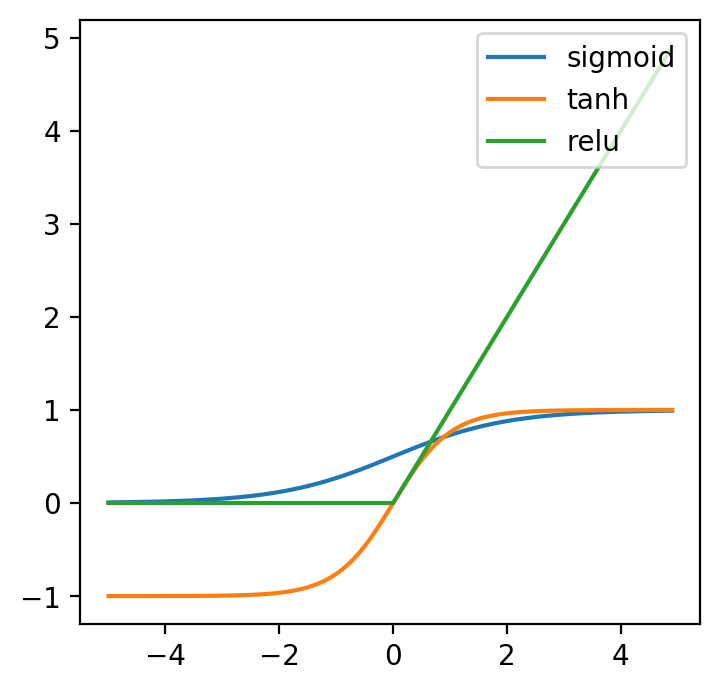

In [9]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

# 活性化関数の描画処理
x = np.arange(-5.0, 5.0, 0.1)
fig = plt.figure(figsize=(4,4), dpi=200)
plt.plot(x, sigmoid(x), label="sigmoid")
plt.plot(x, tanh(x), label="tanh")
plt.plot(x, relu(x), label="relu")
plt.legend(bbox_to_anchor=(1,1), loc="upper right")
plt.show()

## ニューラルネットワークを構築したい場合

ニューラルネットワーク（Deep Neural Networkを含む）を構築したい場合、一般に以下のような対応が必要になります。

1. データセットの作成
1. ニューラルネットワークの定義
1. ニューラルネットワークの学習

### 1. データセットの作成

機械学習全般に言えますが、まずはモデルを構築するための材料となるデータセットを作成する必要があります。<br>
例として、画像一枚を判定して、どのような画像か？（例えば、馬なのか、人なのか、家なのか？など）を判定するモデルを作るならば、画像に対して、どのような画像か？をラベル付したデータセットを作る必要があります。

### 2. ニューラルネットワークの定義

ニューラルネットワークの構造をまずは定義する必要があります。<br>
下記は一例ですが、例えば以下のようなことを考えてモデル構築を行います。<br>

* 利用するオペレーター（演算子）は何を使うか？
* 隠れ層でのデータの次元数をどうするか？
* 利用する活性化関数はどうするか？
* 損失関数をどのように定義するか？
* 出力はどのようなデータを出せば良いか？
* ..etc

一からモデルを構築しても良いですが、昨今だとフレームワークにメジャーなモデルは実装されているケースが多く、<br>
一からモデルを定義することは希と言えます。<br>
※下記に有名どころなモデル名を記載します。（下記のモデルを更に発展させたモデルも多数あります）

* VGG19, ResNet50, MobileNet..etc
* LSTM, GRU, Transformer..etc

### 3. ニューラルネットワークの学習

ニューラルネットワークでは、重み（パラメーター）を与えられたデータセットに合わせて、チューニングを行います。<br>
これは機械学習全般に言えることですが、このパラメーターチューニングを「モデルの学習」と呼びます。<br>

モデルの学習時は以下のステップで処理を行います。<br>
下記の処理を繰り返し行い、モデルのパラメーターをチューニングしていきます。<br>

1. 順伝播処理の実施（入力層にデータを入れて、出力層から結果を出力）
1. 誤差の算出（出力結果を何かしらのデータ（例えば、教師データなど）と比較して、損失関数から誤差を算出）
1. 誤差逆伝播の実施（出力層の誤差情報を、各層に対してフィードバック）
1. パラメーター最適化（各層の誤差情報を元に、パラメーターを最適化する。最適化関数を利用）

ここで、言葉の定義を以下に記載します。
* 全データを利用して一度学習した場合、「1エポック（epoch）」分の学習を実施したと言います。
* 前述した学習ステップを一回行う際に、入力に入れるデータ数をバッチ（batch）サイズ、と呼びます。
* batchサイズごとにN回学習した際に1epoch分の学習が実施される場合、Nをイテレーション数と呼びます。

例えば、全データ数が100個ある場合、batchサイズを5とすると、
* イテレーション数は 100 / 5 = 20 となります。
* 1epoch分学習する場合、20回学習を実施した場合となります。

## DeepLearningをもっと知りたい方へ

参考書籍として、[「ゼロから作るDeep Learning」（オライリー）](https://www.amazon.co.jp/%E3%82%BC%E3%83%AD%E3%81%8B%E3%82%89%E4%BD%9C%E3%82%8BDeep-Learning-%E2%80%95Python%E3%81%A7%E5%AD%A6%E3%81%B6%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%81%AE%E7%90%86%E8%AB%96%E3%81%A8%E5%AE%9F%E8%A3%85-%E6%96%8E%E8%97%A4-%E5%BA%B7%E6%AF%85/dp/4873117585)がとてもオススメです！<br>
※上記シリーズを全部読んでも良いですし、とりあえず1だけでも読むと、DeepLearningの理解がとても深まると思います。

### ニューラルネットワークの利用について

前述した「モデルの学習」によって得られたニューラルネットワークのモデルを利用して、<br>
入力データを何かしらの形式に出力することを、「モデルの推論」と言います。<br>
学習ステップで記載している「順伝播処理の実施(Feed Forward)」と同様の処理を行なっています。
